In [2]:
from pycalphad import Database, variables as v
from espei.datasets import recursive_glob, load_datasets
from espei.plot import dataplot
from tinydb import where, Query
import matplotlib.pyplot as plt

[{'components': ['CR', 'NB'], 'phases': ['LIQUID', 'NB0.04CR0.96_229_CI2', 'NBCR2_194_HP12'], 'conditions': {'P': 101325.0, 'T': [2170.02, 2154.92, 2154.92, 2139.4300000000003, 2139.42, 2123.8, 2123.8, 2108.04, 2108.04, 2092.1400000000003, 2092.1400000000003, 2076.12, 2076.12, 2059.96, 2059.96, 2043.67, 2043.66, 2027.24, 2027.24, 2010.69, 2010.68, 1994.0, 1993.99, 1977.18, 1977.17, 1960.22, 1960.22, 1943.13, 1943.13, 1925.91, 1925.91, 1908.56, 1908.56, 1891.41, 1902.9, 1902.91, 1914.08, 1914.09, 1924.63, 1924.64, 1934.54, 1934.55, 1943.81, 1943.82, 1952.41, 1952.42, 1960.33, 1960.34, 1967.56, 1967.57, 1974.09, 1974.1, 1979.9, 1979.91, 1984.98, 1984.99, 1989.32, 1989.32, 1992.89, 1992.9, 1995.7, 1995.7, 1997.72, 1997.72, 1998.94, 1998.95, 1999.36, 1999.36, 1999.11, 1999.11, 1998.38, 1998.38, 1997.14, 1997.14, 1995.4, 1995.4, 1993.14, 1993.14, 1990.35, 1990.35, 1987.03, 1987.03, 1983.17, 1983.17, 1978.76, 1978.75, 1973.79, 1973.78, 1968.25, 1968.24, 1962.14, 1962.13, 1955.44, 1955.43, 19

<AxesSubplot:title={'center':'Cr-Nb'}, xlabel='X(NB)', ylabel='Temperature (K)'>

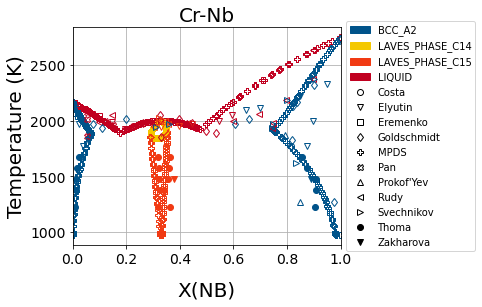

In [14]:

comps = ['CR', 'NB','VA']
#phases = list(dbf.phases.keys())
#print(phases)
conds = {v.N: 1.0, v.P: 101325, v.T: (300, 4000, 20), v.X('NB'): (0, 1, 0.02)}
datasets = load_datasets(recursive_glob('.','*.json'))
print(datasets.all())
datasets.update({'reference':'MPDS'},Query().reference.search('C9'))

for records in datasets:
    if records['reference']!='MPDS':
        #records['phases']=['EXP']
        print('S=',records)
        for i in range(len(records['conditions']['T'])):
            records['conditions']['T'][i]=records['conditions']['T'][i]+273
        
        #for i in range(len(records['values'])):
         #   print('N=',records['values'][i])
          #  for j in range(len(records['values'][i])):
           #     records['values'][i][j][0] = 'EXP'
        #print('Y=',records)
    a=records['phases']
    records['phases']=['BCC_A2' if o=='NB0.04CR0.96_229_CI2' else o for o in records['phases']]
    records['phases']=['LIQUID' if o=='L' else o for o in records['phases']]
    records['phases']=['SIGMA' if o=='CR0.5FE0.5_136_TP30' else o for o in records['phases']]
    records['phases']=['LAVES_PHASE_C14' if o=='NBCR2_194_HP12' else o for o in records['phases']]
    records['phases']=['LAVES_PHASE_C15' if o=='NBCR2_227_CF24' else o for o in records['phases']]
    records['phases']=['BCC_A2' if o=='(NB6.33FE6.67,NB7NI6)' else o for o in records['phases']]
    datasets.update({'phases':records['phases']},where('phases')==a)
    print(records['phases'])
    for i in range(len(records['values'])):
        for j in range(len(records['values'][i])):
            records['values'][i][j] = ['BCC_A2' if o=='NB0.04CR0.96_229_CI2' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['LIQUID' if o=='L' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['SIGMA' if o=='CR0.5FE0.5_136_TP30' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['LAVES_PHASE_C14' if o=='NBCR2_194_HP12' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['LAVES_PHASE_C15' if o=='NBCR2_227_CF24' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['BCC_A2' if o=='(NB6.33FE6.67,NB7NI6)' else o for o in records['values'][i][j]]
phases_1 = [r['phases'] for r in datasets]
phases_db = []
for i in phases_1:
    for j in i:
        if j not in phases_db:
            phases_db.append(j)
#phases_db.append('EXP')
print(phases_db)
dataplot(comps, phases_db, conds,datasets,tielines=False)
#plt.ylim(1000,1750)
#plt.xlim(0.8,1)